<a href="https://colab.research.google.com/github/yeolcook01/ML-DL/blob/main/credit__deliquency_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 전처리

###다운받은 데이터 파일을 -> 새로운 data 폴더에 그대로 옮기기  


```
cp : copy and paste
```

- **드라이브 마운트**: 코랩 노트북과 -- 내 랩탑 내의 파일을 서로 연결해주는 것
- **!mkdir** : 경로(폴더) 생성



In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
!cp "/content/drive/MyDrive/dacon/credit_card_prediction/data" "/content/data"

cp: -r not specified; omitting directory '/content/drive/MyDrive/dacon/credit_card_prediction/data'


In [ ]:
!cp "/content/drive/MyDrive/dacon/credit_card_prediction/data/test.csv" "/content/data/test.csv"

In [ ]:
!cp "/content/drive/MyDrive/dacon/credit_card_prediction/data/train.csv" "/content/data/train.csv"

In [ ]:
!cp "/content/drive/MyDrive/dacon/credit_card_prediction/data/sample_submission.csv" "/content/data/sample_submission.csv"

###pandas 호출해서 csv 파일 읽기 => 변수명으로 저장

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv("/content/data/train.csv")

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


### 데이터 살펴보기: 데이터프레임의 기본 정보 확인하는 방법 세 가지

In [ ]:
train = pd.read_csv("/content/data/train.csv")
test = pd.read_csv("/content/data/test.csv")
sample_submission = pd.read_csv("/content/data/sample_submission.csv")

In [ ]:
#1 (행,열)
train.shape

(26457, 20)

In [ ]:
#2
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
#3 : 데이터프레임 최상단의 다섯 개 프레임으로 줄여서 보여줌
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


###train & test 합치기
- train과 test 데이터를 한꺼번에 전처리시키기 위함.
- 합친 것을 'data'라는 이름의 데이터프레임으로 저장함.

In [ ]:
data = pd.concat([train,test], axis=0)

###결측치 제거하기
- .isnull() 메소드에서 True인 것이 바로 결측치.

In [ ]:
data.isnull()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


In [ ]:
data.isnull().sum() #결측치 개수(=True인 것의 개수)

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
credit           10000
dtype: int64

In [ ]:
train.credit.isnull().sum() #진짜 train 데이터 내의 credit에는 null값이 존재하지 않음.

0

In [ ]:
data.drop("occyp_type", axis=1) #occyp_type의 열 한 줄을 아예 삭제
data = data.drop("occyp_type", axis=1) #data 데이터프레임에 이를 반영 #concat에서의 문법과 비교할 것.

In [ ]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
family_size          0
begin_month          0
credit           10000
dtype: int64

###그룹 나누기

####각 인덱스별 요소의 종류 파악하기

In [ ]:
data['gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
len(data['gender'].unique())

2

#### 모든 인덱스에 대한 값을 한꺼번에 반환하기
- **apply**: 데이터프레임["컬럼"].apply(함수명)=> 해당 함수를 우리가 기존에 정의한 데이터프레임 중 A컬럼에 대해 적용
> df['A'].apply(plus_one) / df['A'].apply(lambda x : x+1)
- **lambda**: lambda 매개변수 : 표현식 =>  함수를 딱 한 줄만으로
>  ex. (lambda x,y: x + y)(10, 20)
- len, unique메소드 이용 : unique는 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 메소드  

https://wikidocs.net/64  
https://koreadatascientist.tistory.com/115  
https://jaaamj.tistory.com/112


In [ ]:
data.apply(lambda x : len(x.unique()))

index            36457
gender               2
car                  2
reality              2
child_num            9
income_total       265
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        7183
DAYS_EMPLOYED     3640
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
family_size         10
begin_month         61
credit               4
dtype: int64

In [ ]:
unique_len = data.apply(lambda x : len(x.unique()))

1. 2개 이하
2. 2개 초과 10개 이하
3. 10개 초과

In [ ]:
unique_len <= 2

index            False
gender            True
car               True
reality           True
child_num        False
income_total     False
income_type      False
edu_type         False
family_type      False
house_type       False
DAYS_BIRTH       False
DAYS_EMPLOYED    False
FLAG_MOBIL        True
work_phone        True
phone             True
email             True
family_size      False
begin_month      False
credit           False
dtype: bool

In [ ]:
group_1 = unique_len[unique_len<=2].index 
#데이터프레임에 함수 적용한 'unique_len' 수식을 []에 대입하면 됨.
#마지막에 index 붙이기.

In [ ]:
group_2 = unique_len[(unique_len <=10) & (unique_len>2)].index

In [ ]:
group_3 = unique_len[unique_len>10].index

### 이진변수 인코딩

In [ ]:
data[group_1] #전체 데이터프레임에서 group_1에 해당하는 것만 쏙!

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,F,N,N,1,0,0,0
1,F,N,Y,1,0,0,1
2,M,Y,Y,1,0,1,0
3,F,N,Y,1,0,1,0
4,F,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
9995,F,Y,Y,1,1,1,0
9996,M,Y,Y,1,1,0,0
9997,F,N,Y,1,0,0,0
9998,F,Y,N,1,0,1,0


####알파벳으로 되어있는 것을 숫자로 변환해야 함 (group_1의 경우 이진변수)
- replace 메소드 사용
> 데이터프레임.replace(바꾸기 전, 바꾼 결과)
- 메소드이므로 직접 다시 적용시켜야 함

In [ ]:
data['gender'] = data['gender'].replace(['F', 'M'], [0, 1])

In [ ]:
data['car'] = data['car'].replace(['N', 'Y'], [0,1])

In [ ]:
data['reality'] = data['reality'].replace(['N', 'Y'], [0,1])

In [ ]:
data[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1
2,1,1,1,1,0,1,0
3,0,0,1,1,0,1,0
4,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
9995,0,1,1,1,1,1,0
9996,1,1,1,1,1,0,0
9997,0,0,1,1,0,0,0
9998,0,1,0,1,0,1,0


### 연속형 변수 이상치 처리
- 숫자에 대한 전처리
- 문자에 대한 전처리

In [ ]:
data[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,Working,Incomplete higher,Married,House / apartment,2.0,NaN
9996,0,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,NaN
9997,0,Working,Secondary / secondary special,Married,House / apartment,2.0,NaN
9998,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,NaN


In [ ]:
# 숫자에 대한 전처리
data['child_num'].unique()
data['child_num'].value_counts()

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: child_num, dtype: int64

**value_counts()** 메소드: 각 요소가 몇 개씩 분포해있는지 확인  
**.plot**: 데이터프레임은 matplotlib과 연동되어 간단한 방식으로 도표화할 수 있음.

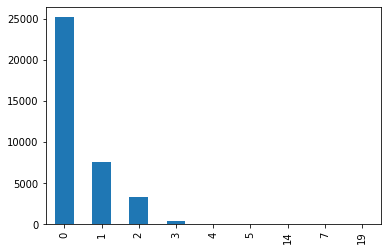

In [ ]:
data['child_num'].value_counts().plot.bar()

In [ ]:
data[data['child_num'] > 2] # child_num이 2보다 큰 모든 경우에 대한 row를 반환함

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
289,289,1,0,0,3,90000.0,State servant,Secondary / secondary special,Married,House / apartment,-14348,-727,1,0,0,1,5.0,-5.0,2.0
321,321,1,1,0,4,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15328,-2578,1,0,0,0,6.0,-30.0,2.0
342,342,0,1,1,4,112500.0,Working,Higher education,Married,House / apartment,-13671,-1974,1,0,0,0,6.0,-12.0,0.0
410,410,0,0,1,3,180000.0,State servant,Higher education,Married,House / apartment,-16000,-7401,1,0,0,0,5.0,-7.0,2.0
476,476,1,0,0,3,180000.0,Working,Secondary / secondary special,Married,House / apartment,-14243,-3535,1,0,0,0,5.0,-52.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,36221,0,0,1,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-14838,-1539,1,0,0,0,5.0,-5.0,NaN
9797,36254,0,1,1,3,81000.0,Working,Secondary / secondary special,Married,House / apartment,-14595,-884,1,0,0,0,5.0,-53.0,NaN
9818,36275,1,1,0,4,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15328,-2578,1,0,0,0,6.0,-14.0,NaN
9923,36380,1,1,1,3,270000.0,Commercial associate,Higher education,Married,House / apartment,-13964,-836,1,0,0,1,5.0,-34.0,NaN


#### 데이터프레임 인덱싱하는 세 가지 방법
- 직접 인덱싱
- df.loc["row", "column"]
- df.iloc["index of row", "index of column"]

https://bearwoong.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-DataFrame-%EC%9D%B8%EB%8D%B1%EC%8B%B1-%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95df-dfloc-dfiloc  


In [ ]:
# 우리는 child_num 값 자체만을 바꿀 것이기에 => loc을 사용
data.loc[data['child_num']>2, 'child_num']

289     3
321     4
342     4
410     3
476     3
       ..
9764    3
9797    3
9818    4
9923    3
9964    4
Name: child_num, Length: 508, dtype: int64

In [ ]:
#위의 값들을 모두 2로 바꾸어줌
data.loc[data['child_num']>2, 'child_num'] = 2

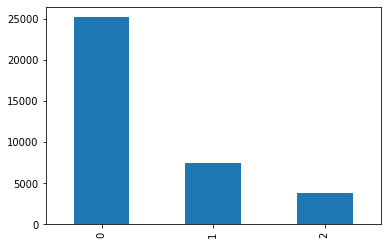

In [ ]:
data['child_num'].value_counts().plot.bar()

In [ ]:
data[group_2] #group_2의 child_num 부분 전처리 완료됨을 확인.

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,Working,Incomplete higher,Married,House / apartment,2.0,NaN
9996,0,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,NaN
9997,0,Working,Secondary / secondary special,Married,House / apartment,2.0,NaN
9998,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,NaN


### categorial 변수 전처리
- **unique**는 각 인덱스를 구성하는 요소의 '종류'를 묻고, **value_counts**는 해당 요소가 '몇 개씩' 있는지를 물음.
- (아직 group_2 진행 중) cihld_num을 제외한 나머지 인덱스에 대해, 각각을 replace하는 것도 가능하지만, 너무 많고 번거로움.  
=> **사이킷런** 이용.

In [ ]:
# categorial 변수 분포 확인
data[group_2].apply(lambda x : len(x.unique())) 

child_num       3
income_type     5
edu_type        5
family_type     5
house_type      6
family_size    10
credit          4
dtype: int64

전체 칼럼 출력 : **.columns**  
https://bigdaheta.tistory.com/43 


In [ ]:
[x for x in data[group_2].columns]

['child_num',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'family_size',
 'credit']

In [ ]:
column_list_2 = [x for x in data[group_2]]

for x in column_list_2:
  print(x)

child_num
income_type
edu_type
family_type
house_type
family_size
credit


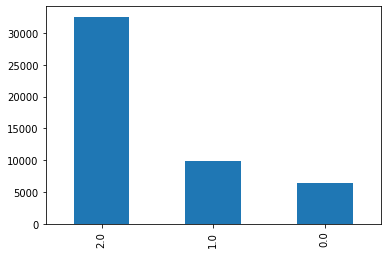

In [ ]:
for x in column_list_2:
  data[x].value_counts().plot.bar()

#요소가 숫자가 아니면 곧바로 .plot.bar()를 쓸 수 없음 => value_counts()로 접근해야 함.
#그런데 하나의 셀에서 코드 하나로 plot을 여러 개 출력하는 건 불가능한가보다 ㅠㅠ 여러 개 plot 출력 방법은 따로 있을 듯.

In [ ]:
from sklearn import preprocessing

#### sklearn의 preprocessing 가운데 LabelEncoder()를 통해 문자형 카테고리를 숫자형으로 변환
- 'label_encoder'과 같이 새롭게 생성해야 함
- 생성한 것에 fit_transform() 메소드를 사용하여, 갖고 있는 데이터에 적용.

In [ ]:
#문자로 된 카테고리를 숫자로 변환해주는 LabelEncoder()
label_encoder = preprocessing.LabelEncoder()

In [ ]:
data['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [ ]:
label_encoder.fit_transform(data['income_type'])

array([0, 0, 4, ..., 4, 0, 4])

In [ ]:
set(label_encoder.fit_transform(data['income_type']))

{0, 1, 2, 3, 4}

In [ ]:
for x in ['income_type', 'edu_type', 'family_type', 'house_type']:
  data[x] = label_encoder.fit_transform(data[x])
  print(data[x].unique,"\n---")

<bound method Series.unique of 0       0
1       0
2       4
3       0
4       2
       ..
9995    4
9996    4
9997    4
9998    0
9999    4
Name: income_type, Length: 36457, dtype: int64> 
---
<bound method Series.unique of 0       1
1       4
2       1
3       4
4       1
       ..
9995    2
9996    4
9997    4
9998    4
9999    1
Name: edu_type, Length: 36457, dtype: int64> 
---
<bound method Series.unique of 0       1
1       0
2       1
3       1
4       1
       ..
9995    1
9996    0
9997    1
9998    1
9999    1
Name: family_type, Length: 36457, dtype: int64> 
---
<bound method Series.unique of 0       2
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: house_type, Length: 36457, dtype: int64> 
---


In [ ]:
data[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,0,1,1,2,2.0,1.0
1,1,0,4,0,1,3.0,1.0
2,0,4,1,1,1,2.0,2.0
3,0,0,4,1,1,2.0,0.0
4,0,2,1,1,1,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,4,2,1,1,2.0,NaN
9996,0,4,4,0,1,2.0,NaN
9997,0,4,4,1,1,2.0,NaN
9998,0,0,4,1,1,2.0,NaN


###연속형 변수 구간화
- nupmy & pandas 이용
- https://javapp.tistory.com/162 ★★

In [ ]:
data[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,202500.0,-13899,-4709,-6.0
1,1,247500.0,-11380,-1540,-5.0
2,2,450000.0,-19087,-4434,-22.0
3,3,202500.0,-15088,-2092,-37.0
4,4,157500.0,-15037,-2105,-26.0
...,...,...,...,...,...
9995,36452,202500.0,-18593,-5434,-19.0
9996,36453,202500.0,-10886,-1315,-34.0
9997,36454,292500.0,-21016,-14018,-55.0
9998,36455,180000.0,-16541,-1085,-33.0


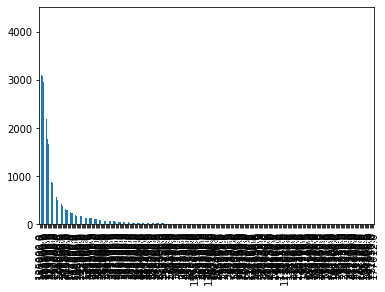

In [ ]:
data['income_total'].value_counts().plot.bar() #요소의 개수가 무려 265개 => 구간화 필요. => numpy & pandas 이용.

numpy의 histogram 메소드로, 원하는 구간 개수만큼 데이터를 자름.

In [ ]:
import numpy as np

In [ ]:
np.histogram(data['income_total'], bins=7 ) #7개의 구간으로 나눔

(array([29852,  6071,   413,    96,    11,     6,     8]),
 array([  27000.        ,  248142.85714286,  469285.71428571,
         690428.57142857,  911571.42857143, 1132714.28571429,
        1353857.14285714, 1575000.        ]))

In [ ]:
count, bin_dividers = np.histogram(data['income_total'], bins=7 ) 

In [ ]:
data['income_total']

0       202500.0
1       247500.0
2       450000.0
3       202500.0
4       157500.0
          ...   
9995    202500.0
9996    202500.0
9997    292500.0
9998    180000.0
9999    270000.0
Name: income_total, Length: 36457, dtype: float64

**pandas의 cut 메소드**로, np를 통해 생성한 divde 기준을 이용하여, 실제 데이터를 수정함.  
- pd.cut(자를 데이터, bins = 자르는 기준)

In [ ]:
pd.cut(data['income_total'], bins = bin_dividers) #income_total 내의 요소들이 어느 구간으로 배당되었는지 확인.

0          (27000.0, 248142.857]
1          (27000.0, 248142.857]
2       (248142.857, 469285.714]
3          (27000.0, 248142.857]
4          (27000.0, 248142.857]
                  ...           
9995       (27000.0, 248142.857]
9996       (27000.0, 248142.857]
9997    (248142.857, 469285.714]
9998       (27000.0, 248142.857]
9999    (248142.857, 469285.714]
Name: income_total, Length: 36457, dtype: category
Categories (7, interval[float64, right]): [(27000.0, 248142.857] < (248142.857, 469285.714] <
                                           (469285.714, 690428.571] < (690428.571, 911571.429] <
                                           (911571.429, 1132714.286] < (1132714.286, 1353857.143] <
                                           (1353857.143, 1575000.0]]

In [ ]:
print(list(range(0,7))) #list까지 꼭 포함해주어야 함
print([i for i in range(7)])
print(np.arange(7)) #numpy의 arange 통해 바로 list로 반환 가능.

[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[0 1 2 3 4 5 6]


In [ ]:
pd.cut(data['income_total'], bins = bin_dividers, include_lowest = True, labels = list(range(7)))
#include_lowest를 통해 구간의 시작점을 구간에 포함시킴.
#labels를 통해 각 구간 자체를 간단한 숫자로 인코딩해줌.

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: income_total, Length: 36457, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

#####이하 내용이 좀 어렵다....  
https://javapp.tistory.com/162 ★★  
**factorize() 함수**는 두 개의 값을 반환하는데, 인코딩된 값(int)과 인코딩된 범주(object)입니다.  
https://pandas.pydata.org/docs/reference/api/pandas.factorize.html  


In [ ]:
#위에서 pd.cut이 출력하는 dtype이 category이므로 이를 수정해야 함. => int로 변환.
data['income_total'] = pd.factorize(pd.cut(data['income_total'], bins = bin_dividers, include_lowest = True, labels = list(range(7))))[0]

In [ ]:
data['income_total']

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: income_total, Length: 36457, dtype: int64

In [ ]:
def make_bin(array, n):
  array = -array #대부분의 요소가 음수이므로 양수로 변환 ★★★
  _, bin_dividers = np.histogram(array, bins = n)
  cut_categories = pd.cut(array, bins = bin_dividers, include_lowest = True, labels = list(range(n)))
  bined_array = pd.factorize(cut_categories)[0]
  return bined_array


numpy의 array는 value_counts를 사용할 수 없음.  
해당 array를 **pandas의 Series로 변환**해야 함.  

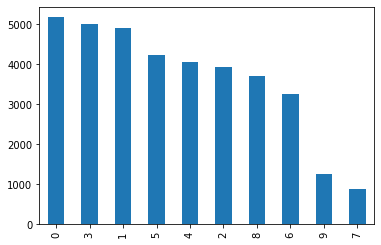

In [ ]:
pd.Series(make_bin(data['DAYS_BIRTH'], 10)).value_counts().plot.bar()

In [ ]:
data['DAYS_BIRTH'] = make_bin(data['DAYS_BIRTH'], 10)
data['DAYS_EMPLOYED'] = make_bin(data['DAYS_EMPLOYED'], 6)
data['begin_month'] = make_bin(data['begin_month'], 4)

In [ ]:
data[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,0,0,0,0
1,1,0,1,0,0
2,2,1,2,0,1
3,3,0,3,0,2
4,4,0,3,0,1
...,...,...,...,...,...
9995,36452,0,2,0,1
9996,36453,0,5,0,2
9997,36454,1,8,0,3
9998,36455,0,4,0,2


간단한 정수형으로 구간화 완료됨.

# 2. 모델 학습

### train-test 분할하기

In [ ]:
data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0,2.0,0,1.0
1,1,0,0,1,1,0,0,4,0,1,1,0,1,0,0,1,3.0,0,1.0
2,2,1,1,1,0,1,4,1,1,1,2,0,1,0,1,0,2.0,1,2.0
3,3,0,0,1,0,0,0,4,1,1,3,0,1,0,1,0,2.0,2,0.0
4,4,0,1,1,0,0,2,1,1,1,3,0,1,0,0,0,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0,4,2,1,1,2,0,1,1,1,0,2.0,1,NaN
9996,36453,1,1,1,0,0,4,4,0,1,5,0,1,1,0,0,2.0,2,NaN
9997,36454,0,0,1,0,1,4,4,1,1,8,0,1,0,0,0,2.0,3,NaN
9998,36455,0,1,0,0,0,0,4,1,1,4,0,1,0,1,0,2.0,2,NaN


In [ ]:
train.shape

(26457, 20)

In [ ]:
test.shape

(10000, 19)

In [ ]:
data.shape

(36457, 19)

In [ ]:
train = data[:-10000] #데이터프레임 인덱싱에서 :는 column이 아닌 row만! #train에 해당

In [ ]:
test = data[-10000:] #test에 해당

In [ ]:
train_x = train.drop("credit", axis=1) #credit column을 제외한 train

데이터프레임 인덱싱에서 loc 유의사항
- 아래 코드에서 **train.loc[:"credit"]**이라고 하면, 전체 행 X credit까지의 열: 즉 표 전체가 출력됨  
- 특정 column만 추출하고 싶다면, **train.loc[:,"credit"]**과 같이 콤마를 추가해야 함

In [ ]:
asdf = train.loc[:,"credit"]
print(asdf)

qwer = train["credit"] #이런 식으로 출력도 가능함. #직접 인덱싱 방법은 :를 사용한 리스트 슬라이싱에서 row에만 적용되는 비일관성때문에 헷갈리나봐!
print(qwer)

0        1.0
1        1.0
2        2.0
3        0.0
4        2.0
        ... 
26452    1.0
26453    2.0
26454    2.0
26455    2.0
26456    2.0
Name: credit, Length: 26457, dtype: float64
0        1.0
1        1.0
2        2.0
3        0.0
4        2.0
        ... 
26452    1.0
26453    2.0
26454    2.0
26455    2.0
26456    2.0
Name: credit, Length: 26457, dtype: float64


In [ ]:
train_y = train["credit"]

In [ ]:
test_x = test.drop("credit", axis=1)

In [ ]:
test_y = test["credit"]

### Random Forest
- 트리 기반 앙상블 모델 (사이킷런에서 제공하는 머신러닝 툴)
- RandomForestClassifier()
- 분류기.fit 메소드
- 분류기.predict_proba 메소드
- numpy의 np.argmax(예측확률, axis = 방향)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier() #랜덤 포레스트 분류기 생성

In [ ]:
clf.fit(train_x, train_y) #이미 정답이 주어진 train 데이터에 대해서는, fit을 통해 학습시킴
# 결과를 따로 저장할 필요 없이, 내부에 스스로 저장됨

RandomForestClassifier()

In [ ]:
train_proba = clf.predict_proba(train_x) #predict_proba 통해 확인할 수 있음
#train_y에 대한 예측값 반환: column이 3개인 것은 y 클라스가 3종류이기 때문.
#얘는 직접 따로 저장해주어야 함.

In [ ]:
np.argmax(train_proba, axis=1) #각 row마다 확률값이 가장 높은 column을 찾음

array([1, 1, 2, ..., 2, 2, 2])

In [ ]:
test_proba = clf.predict_proba(test_x)
print(test_proba)

#데이콘 원칙 상, 주어진 sample_submission에 아래 예측 결과를 집어넣어야 함.

[[0.06 0.2  0.74]
 [0.07 0.36 0.57]
 [0.1  0.13 0.77]
 ...
 [0.04 0.1  0.86]
 [0.08 0.35 0.57]
 [0.11 0.37 0.52]]


In [ ]:
np.argmax(test_proba, axis=1)

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
sample_submission.iloc[:,1:]

,0,1,2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
9995,0,0,0
9996,0,0,0
9997,0,0,0
9998,0,0,0


In [ ]:
sample_submission.iloc[:,1:] = test_proba
print(sample_submission) # 예측결과 집어넣기 완료! #index는 필요 없으므로 False!

      index     0     1     2
0     26457  0.06  0.20  0.74
1     26458  0.07  0.36  0.57
2     26459  0.10  0.13  0.77
3     26460  0.12  0.24  0.64
4     26461  0.10  0.39  0.51
...     ...   ...   ...   ...
9995  36452  0.16  0.31  0.53
9996  36453  0.18  0.32  0.50
9997  36454  0.04  0.10  0.86
9998  36455  0.08  0.35  0.57
9999  36456  0.11  0.37  0.52

[10000 rows x 4 columns]


해당 예측 결과를 csv 파일로 변환
- 데이터프레임.to_csv("파일명")

In [ ]:
sample_submission.to_csv("sample_submission_ver1.csv", index=False)

# 3. Validation 데이터 분할
- 사이킷런의 model_selection의 train_test_split을 활용
- stratify

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split(train_x, train_y, stratify = train_y, test_size = 0.25, random_state = 10086) 
#'stratify = train_y': train_y에 존재하는 요소의 비율을 고려하여, 검증셋과 훈련셋을 분할함

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(train_x, train_y, 
                                                  stratify = train_y, 
                                                  test_size = 0.25, 
                                                  random_state = 10086) 
# 직접 데이터명 지정하여 따로 저장함

In [ ]:
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(19842, 18) (6615, 18) (19842,) (6615,)


아까 방법 그대로. clf 분류기를 학습시켜보자!

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_proba = clf.predict_proba(X_val) #학습한 분류기의 예측 결과

In [ ]:
Y_val

36       2.0
3464     2.0
2640     2.0
22500    1.0
17275    1.0
        ... 
6806     1.0
23096    2.0
7756     2.0
23331    2.0
25457    2.0
Name: credit, Length: 6615, dtype: float64

사이킷런의 함수 통해 점수 반환하려면, Y_val을 원핫인코딩 형태로 변환해야 함.
- pandas의 get.dummies()

In [ ]:
Y_val_onehot = pd.get_dummies(Y_val) #실제 정답지

val에 대한 점수 반환해보기
- 사이킷런의 metrics의 log_loss 함수 이용
- log_loss(정답, 예측값)

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
log_loss(Y_val_onehot, Y_proba)

1.0363804224236568

# 4. K-fold 교차검증
- 과적합 방지 위한 툴
- 데이터를 k개의 폴드로 쪼개어 하나씩 돌아가며 valid data를 수행함 => k개 경우의 성능 평균을 산출
- 사이킷런의 model_selection에서 (Stratified)KFold 사용
> StratifiedKFold(n_splites = n, shuffle = True, randome_state = n)  
> 각 데이터의 인덱스 숫자를 기준으로.

In [ ]:
from sklearn.model_selection import StratifiedKFold 
#단순 KFold를 사용할 수 있지만 stratified가 추가된 버전을 사용하자!

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55) #KFold 생성기 생성.

In [ ]:
for index in folds.split(train_x, train_y): 
  #split 메소드 통해 K개로 쪼갬
  break

In [ ]:
index #튜플 형태로 train과 valid로 쪼개짐 

(array([    0,     1,     2, ..., 26454, 26455, 26456]),
 array([    4,    12,    23, ..., 26442, 26443, 26446]))

In [ ]:
train_index, val_index = index #위의 결과물 각각을 다른 이름으로 저장

In [ ]:
train_index

array([    0,     1,     2, ..., 26454, 26455, 26456])

enumerate 함수: 출력되는 현재 for문에 몇번째에 대한 for문인지 알려줌

#####K_fold 작동 방식 파악 위해, 한 번씩 건드려보기

In [ ]:
for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
  break

In [ ]:
n_fold #현재 0번째 폴드

0

In [ ]:
train_index

array([    0,     1,     2, ..., 26454, 26455, 26456])

In [ ]:
val_index

array([    4,    12,    23, ..., 26442, 26443, 26446])

In [ ]:
X_train = train_x.iloc[train_index]

In [ ]:
X_val = train_x.iloc[val_index]

#####for문으로 합치기
- 각각의 학습이 서로 독립적으로 이루어지도록, classifier를 매번 새롭게 선언해야 함.
- 문자열 formatting 문법 기억!
> "%d번째 학습 결과는 %.4f점 입니다.\n\n"%(n_fold+1,score)  
> https://studymake.tistory.com/179

In [ ]:
scores = []
n_splits=5
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)

#각각의 학습이 서로 독립적으로 이루어지도록, classifier를 매번 새롭게 선언해야 함.
for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
  X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
  Y_train, Y_val = train_y.iloc[train_index], train_y.iloc[val_index]
  clf = RandomForestClassifier()
  clf.fit(X_train, Y_train)
  Y_val_proba = clf.predict_proba(X_val)
  Y_val_onehot = pd.get_dummies(Y_val)
  score = log_loss(Y_val_onehot, Y_val_proba)
  print("%d번째 학습 결과는 %.4f점 입니다.\n\n"%(n_fold+1,score))
  scores.append(score)

  if n_fold+1 == n_splits:
    avg_score = sum(scores)/n_splits #numpy통해 np.mean(scores)로 바로 구할 수 있음.
    print("평균 점수는 %.4f점 입니다!"%avg_score)
    break





1번째 학습 결과는 1.0524점 입니다.


2번째 학습 결과는 1.0799점 입니다.


3번째 학습 결과는 1.1412점 입니다.


4번째 학습 결과는 1.0329점 입니다.


5번째 학습 결과는 1.0653점 입니다.


평균 점수는 1.0743점 입니다!


# 최종 Test (KFold 적용)

- 이같은 방식으로 계산된 점수를 기준으로, 랜덤포레스트 classifier를 튜닝하고, 더 좋은 성능의 모델을 만들 수 있음.  
- 각 fold별로 모델을 바로 추론에 사용하여 제출물을 만들 수도 있음: **앙상블**!

In [ ]:
scores = []
sub = np.zeros((test_x.shape[0],3)) # 제출해야 하는 값: test_x의 row X 3개의 columns

#각각의 학습이 서로 독립적으로 이루어지도록, classifier를 매번 새롭게 선언해야 함.
for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
  X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
  Y_train, Y_val = train_y.iloc[train_index], train_y.iloc[val_index]
  clf = RandomForestClassifier()
  clf.fit(X_train, Y_train)
  Y_val_proba = clf.predict_proba(X_val)
  Y_val_onehot = pd.get_dummies(Y_val)
  
  sub += clf.predict_proba(test_x) #얘랑

  score = log_loss(Y_val_onehot, Y_val_proba)
  scores.append(score) #얘랑 구분하기!!

sub = sub / 5
np.mean(scores) #fold별 추론 값들의 평균 (다섯 번의 추론 결과 평균)

1.0620642178419237

In [ ]:
sample_submission.iloc[:,1:] = sub
print(sample_submission)

      index      0      1      2
0     26457  0.116  0.190  0.694
1     26458  0.090  0.308  0.602
2     26459  0.058  0.228  0.714
3     26460  0.118  0.302  0.580
4     26461  0.072  0.376  0.552
...     ...    ...    ...    ...
9995  36452  0.082  0.388  0.530
9996  36453  0.162  0.292  0.546
9997  36454  0.078  0.168  0.754
9998  36455  0.110  0.406  0.484
9999  36456  0.098  0.354  0.548

[10000 rows x 4 columns]


In [ ]:
sample_submission.to_csv("5fold_prediction.csv", index=False)